## **Data Understanding**

## **Data Preparation**

### Download Data dari Google Drive

In [1]:
import gdown
import zipfile
import os

# ID file dari link Google Drive
file_id = "1VvtgAxvsTVM0heBYEHww0e0VZPFoEvcP"
url = f"https://drive.google.com/uc?id={file_id}"

output_zip = "data/face.zip"
extract_dir = "data"

# Pastikan folder data ada
os.makedirs("data", exist_ok=True)

# Selalu cek apakah sudah ada hasil ekstrak
if not os.path.exists(extract_dir+"/2. SKENARIO PSIKOLOGI REMAJA"):
    print("[INFO] Mengunduh file zip...")
    gdown.download(url, output_zip, quiet=False)

    print("[INFO] Mengekstrak file...")
    with zipfile.ZipFile(output_zip, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

    os.remove(output_zip)
    print("[INFO] File zip dihapus.")
else:
    print("[SKIP] Folder sudah ada, tidak perlu download ulang.")

print("[SELESAI] Dataset tersedia di folder:", extract_dir)

[SKIP] Folder sudah ada, tidak perlu download ulang.
[SELESAI] Dataset tersedia di folder: data


### Ekstrak Video Menjadi Gambar

In [2]:
import cv2
import random
from pathlib import Path
from tqdm import tqdm
import shutil

# Folder sumber & target
SRC_DIR = Path("data/SKENARIO PSIKOLOGI REMAJA")
DST_DIR = Path("data/2. SKENARIO PSIKOLOGI REMAJA/split")  # <- ganti ke split folder
IMG_RESIZE = (224, 224)
DST_DIR.mkdir(parents=True, exist_ok=True)

SEED = 2025
random.seed(SEED)

def get_video_duration(video_path):
    cap = cv2.VideoCapture(str(video_path))
    if not cap.isOpened():
        return 0
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    cap.release()
    return total_frames // fps if fps > 0 else 0

def extract_frames(video_path, dst_folder, pbar, resize_dim=(224, 224)):
    video_name = video_path.stem
    dst_folder.mkdir(parents=True, exist_ok=True)
    cap = cv2.VideoCapture(str(video_path))
    if not cap.isOpened():
        print(f"[SKIP] Tidak bisa buka {video_path}")
        return
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_idx, sec = 0, 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        if fps > 0 and frame_idx % fps == 0:
            frame_name = f"{video_name}_{sec:05d}.jpg"
            save_path = dst_folder / frame_name
            resized = cv2.resize(frame, resize_dim)
            cv2.imwrite(str(save_path), resized)
            sec += 1
            pbar.update(1)
        frame_idx += 1
    cap.release()

if __name__ == "__main__":
    jenis_folders = [f for f in SRC_DIR.iterdir() if f.is_dir() and f.name.startswith("Jenis")]

    for jenis_folder in jenis_folders:
        video_paths = list(jenis_folder.glob("*.mp4")) + list(jenis_folder.glob("*.avi")) + list(jenis_folder.glob("*.mov"))

        # split video list 80:10:10
        random.shuffle(video_paths)
        n = len(video_paths)
        n_train = int(0.8 * n)
        n_val = int(0.1 * n)
        train_videos = video_paths[:n_train]
        val_videos   = video_paths[n_train:n_train+n_val]
        test_videos  = video_paths[n_train+n_val:]

        subsets = {
            "train": train_videos,
            "val": val_videos,
            "test": test_videos
        }

        for split, vids in subsets.items():
            dst_split = DST_DIR / split / jenis_folder.name
            dst_split.mkdir(parents=True, exist_ok=True)
            total_duration = sum(get_video_duration(v) for v in vids)
            print(f"\n[{split.upper()}] {jenis_folder.name}: {len(vids)} video, {total_duration} detik")
            with tqdm(total=total_duration, desc=f"{split}-{jenis_folder.name}", unit="s") as pbar:
                for v in vids:
                    extract_frames(v, dst_split, pbar, resize_dim=IMG_RESIZE)

    print("\n✅ Ekstraksi selesai! Hasil ada di:", DST_DIR)


[TRAIN] Jenis 1: 44 video, 162 detik


train-Jenis 1: 205s [00:13, 15.56s/s]                          



[VAL] Jenis 1: 5 video, 16 detik


val-Jenis 1: 20s [00:01, 14.98s/s]                         



[TEST] Jenis 1: 6 video, 19 detik


test-Jenis 1: 25s [00:01, 18.89s/s]                         



[TRAIN] Jenis 2: 51 video, 230 detik


train-Jenis 2: 280s [01:34,  2.96s/s]                          



[VAL] Jenis 2: 6 video, 27 detik


val-Jenis 2: 33s [00:10,  3.12s/s]                         



[TEST] Jenis 2: 7 video, 27 detik


test-Jenis 2: 34s [00:01, 32.36s/s]                         



[TRAIN] Jenis 3: 36 video, 167 detik


train-Jenis 3: 202s [02:39,  1.26s/s]                          



[VAL] Jenis 3: 4 video, 19 detik


val-Jenis 3: 22s [00:31,  1.44s/s]                         



[TEST] Jenis 3: 6 video, 24 detik


test-Jenis 3: 30s [00:25,  1.19s/s]                         



[TRAIN] Jenis 4: 24 video, 134 detik


train-Jenis 4: 156s [00:08, 18.66s/s]                          



[VAL] Jenis 4: 3 video, 18 detik


val-Jenis 4: 21s [00:01, 13.56s/s]                         



[TEST] Jenis 4: 3 video, 16 detik


test-Jenis 4: 19s [00:01, 13.90s/s]                         



[TRAIN] Jenis 5: 40 video, 235 detik


train-Jenis 5: 274s [00:14, 18.96s/s]                          



[VAL] Jenis 5: 5 video, 28 detik


val-Jenis 5: 33s [00:01, 18.87s/s]                         



[TEST] Jenis 5: 5 video, 27 detik


test-Jenis 5: 32s [00:01, 18.48s/s]                         


✅ Ekstraksi selesai! Hasil ada di: data\2. SKENARIO PSIKOLOGI REMAJA\split


### Mengatur Konfigurasi

In [1]:
import os
import random
from pathlib import Path
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split, Subset, WeightedRandomSampler
from torchvision import transforms, models, datasets

from sklearn.metrics import (
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve,
)

import warnings
warnings.filterwarnings("ignore")

In [2]:
import torch_directml
device = torch_directml.device()
print("[INFO] Using device:", device)

[INFO] Using device: privateuseone:0


In [3]:
SEED = 2025
BATCH_SIZE = 64
IMG_SIZE = 224
NUM_EPOCHS = 10
LEARNING_RATE = 1.618e-6
DATA_ROOT = "data/2. SKENARIO PSIKOLOGI REMAJA/split"
MODEL_PATH = "models/pose-recognition-directml.pt"
PATIENCE = 2
NUM_WORKERS = 0

# reproducible
def seed_everything(seed=SEED):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

seed_everything()

### Data Transformation & Augmentation

In [4]:
class To3Channels:
    def __call__(self, x):
        return x.repeat(3, 1, 1) if x.shape[0] == 1 else x

In [5]:
def build_transforms(img_size=IMG_SIZE):
    train_tf = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.1, contrast=0.1),
        transforms.ToTensor(),
        To3Channels(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225]),
    ])
    val_tf = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),
        To3Channels(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225]),
    ])
    return train_tf, val_tf

train_tf, val_tf = build_transforms()

### Data Loading

In [6]:
train_dataset = datasets.ImageFolder(root=os.path.join(DATA_ROOT, "train"), transform=train_tf)
val_dataset   = datasets.ImageFolder(root=os.path.join(DATA_ROOT, "val"), transform=val_tf)
test_dataset  = datasets.ImageFolder(root=os.path.join(DATA_ROOT, "test"), transform=val_tf)

class_names = train_dataset.classes
num_classes = len(class_names)

print("[INFO] Classes:", class_names, "Num classes:", num_classes)
print("[INFO] Train images:", len(train_dataset))
print("[INFO] Val images:", len(val_dataset))
print("[INFO] Test images:", len(test_dataset))

[INFO] Classes: ['Jenis 1', 'Jenis 5'] Num classes: 2
[INFO] Train images: 479
[INFO] Val images: 53
[INFO] Test images: 57


### Handling Class Imbalance

In [7]:
# Hitung distribusi kelas di training set
train_targets = [label for _, label in train_dataset.samples]
counter = Counter(train_targets)
print("[INFO] Train class distribution:", counter)

[INFO] Train class distribution: Counter({1: 274, 0: 205})


In [8]:
# Hitung distribusi semua kelas
all_targets = [label for _, label in train_dataset.samples +
               val_dataset.samples + test_dataset.samples]
counter_all = Counter(all_targets)
print("[INFO] Class counts (all splits):", counter_all)

[INFO] Class counts (all splits): Counter({1: 339, 0: 250})


In [9]:
# Hitung class weights untuk CrossEntropyLoss
total = sum(counter.values())
class_weights = []
for i in range(len(counter)):
    class_weights.append(total / (len(counter) * counter[i]))
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
print("[INFO] Class weights:", class_weights)

[INFO] Class weights: tensor([1.1683, 0.8741], device='privateuseone:0')


In [10]:
# Buat sample_weights untuk training
weights = 1. / torch.tensor([counter[i] for i in range(len(counter))], dtype=torch.float)
sample_weights = [weights[label] for label in train_targets]

sampler = WeightedRandomSampler(
    weights=sample_weights,
    num_samples=len(sample_weights),
    replacement=True
)

### Data Loader

In [11]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler, num_workers=NUM_WORKERS)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

print("[INFO] DataLoaders ready with WeightedRandomSampler for train set")

[INFO] DataLoaders ready with WeightedRandomSampler for train set


## **Modelling**

In [12]:
# Build a compact but effective CNN using a pretrained backbone (MobileNetV2) and a small classification head.
def get_model(num_classes, variant="large"):
    if variant == "large":
        model = models.mobilenet_v3_large(pretrained=True)
        in_feats = model.classifier[0].in_features   # 960
    else:
        model = models.mobilenet_v3_small(pretrained=True)
        in_feats = model.classifier[0].in_features   # 576

    model.classifier = nn.Sequential(
        nn.Linear(in_feats, 128),
        nn.Hardswish(),
        nn.Dropout(p=0.3),
        nn.Linear(128, num_classes)
    )
    return model

model = get_model(num_classes, variant="large").to(device)
print("[INFO] Model created.")

[INFO] Model created.


In [13]:
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-5)
criterion = nn.CrossEntropyLoss(weight=class_weights)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=1, factor=0.1618, verbose=True)

In [14]:
# Simple EarlyStopping + ModelCheckpoint
class EarlyStopping:
    def __init__(self, patience=PATIENCE, verbose=True, path=MODEL_PATH):
        self.patience = patience
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.verbose = verbose
        self.path = path

    def step(self, val_loss, model):
        if self.best_loss is None or val_loss < self.best_loss - 1e-4:
            self.best_loss = val_loss
            self.counter = 0
            # save model
            torch.save(model.state_dict(), self.path)
            if self.verbose:
                print(f"[CHECKPOINT] Saved new best model (val_loss={val_loss:.4f}) -> {self.path}")
        else:
            self.counter += 1
            if self.verbose:
                print(f"[EARLYSTOP] No improvement ({self.counter}/{self.patience})")
            if self.counter >= self.patience:
                self.early_stop = True

In [15]:
# -------------------------
# Training / Validation loops
# -------------------------
def train_one_epoch(model, loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for imgs, labels in loader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * imgs.size(0)
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += imgs.size(0)
    avg_loss = running_loss / total
    acc = correct / total
    return avg_loss, acc

@torch.no_grad()
def validate(model, loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_probs = []
    all_labels = []
    for imgs, labels in loader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        running_loss += loss.item() * imgs.size(0)
        probs = F.softmax(outputs, dim=1)
        all_probs.append(probs.cpu().numpy())
        all_labels.append(labels.cpu().numpy())
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += imgs.size(0)
    avg_loss = running_loss / total
    acc = correct / total
    all_probs = np.vstack(all_probs)
    all_labels = np.concatenate(all_labels)
    return avg_loss, acc, all_probs, all_labels

In [16]:
# -------------------------
# Training Loop
# -------------------------
def fit(model, train_loader, val_loader, optimizer, criterion, scheduler, epochs=NUM_EPOCHS):
    history = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}
    stopper = EarlyStopping(patience=PATIENCE, verbose=True, path=MODEL_PATH)
    for epoch in range(1, epochs + 1):
        print(f"\nEpoch {epoch}/{epochs}")
        train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion)
        val_loss, val_acc, val_probs, val_labels = validate(model, val_loader, criterion)
        scheduler.step(val_loss)
        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)
        history["train_acc"].append(train_acc)
        history["val_acc"].append(val_acc)
        print(f"train_loss: {train_loss:.4f} | train_acc: {train_acc:.4f}")
        print(f"val_loss:   {val_loss:.4f} | val_acc:   {val_acc:.4f}")
        # early stopping + checkpoint
        stopper.step(val_loss, model)
        if stopper.early_stop:
            print("[INFO] Early stopping triggered.")
            break
    # load best model
    if os.path.exists(MODEL_PATH):
        model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
    return model, history

In [17]:
trained_model, history = fit(model, train_loader, val_loader,
                                 optimizer, criterion, scheduler, epochs=NUM_EPOCHS)


Epoch 1/10
train_loss: 0.6720 | train_acc: 0.6409
val_loss:   0.6979 | val_acc:   0.3962
[CHECKPOINT] Saved new best model (val_loss=0.6979) -> models/pose-recognition-directml.pt

Epoch 2/10
train_loss: 0.6648 | train_acc: 0.6952
val_loss:   0.6956 | val_acc:   0.4528
[CHECKPOINT] Saved new best model (val_loss=0.6956) -> models/pose-recognition-directml.pt

Epoch 3/10
train_loss: 0.6643 | train_acc: 0.6848
val_loss:   0.6933 | val_acc:   0.5472
[CHECKPOINT] Saved new best model (val_loss=0.6933) -> models/pose-recognition-directml.pt

Epoch 4/10
train_loss: 0.6535 | train_acc: 0.7474
val_loss:   0.6910 | val_acc:   0.5660
[CHECKPOINT] Saved new best model (val_loss=0.6910) -> models/pose-recognition-directml.pt

Epoch 5/10
train_loss: 0.6525 | train_acc: 0.7578
val_loss:   0.6885 | val_acc:   0.5660
[CHECKPOINT] Saved new best model (val_loss=0.6885) -> models/pose-recognition-directml.pt

Epoch 6/10
train_loss: 0.6463 | train_acc: 0.7829
val_loss:   0.6859 | val_acc:   0.5849
[CHEC

## **Evaluation**

### Hasil Training

In [18]:
   # Evaluation on test set
# -------------------------
@torch.no_grad()
def predict_on_loader(model, loader):
    model.eval()
    ys = []
    probs = []
    for imgs, labels in loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        p = F.softmax(outputs, dim=1).cpu().numpy()
        probs.append(p)
        ys.append(labels.numpy())
    probs = np.vstack(probs)
    ys = np.concatenate(ys)
    preds = probs.argmax(axis=1)
    return ys, preds, probs

y_true, y_pred, y_prob = predict_on_loader(trained_model, test_loader)

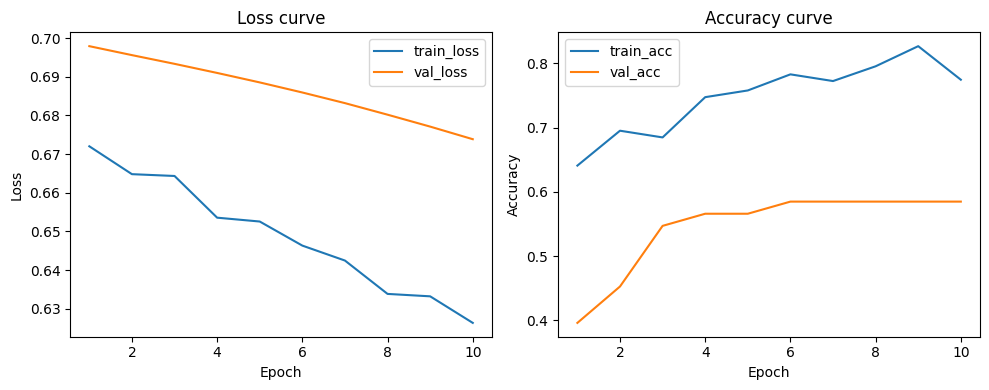

In [19]:
# -------------------------
# Plots: training curves
# -------------------------
def plot_training(history, out="training_plot.png"):
    epochs = range(1, len(history["train_loss"]) + 1)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, history["train_loss"], label="train_loss")
    plt.plot(epochs, history["val_loss"], label="val_loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Loss curve")
    plt.subplot(1,2,2)
    plt.plot(epochs, history["train_acc"], label="train_acc")
    plt.plot(epochs, history["val_acc"], label="val_acc")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Accuracy curve")
    plt.tight_layout()

plot_training(history)

### ROC-AUC Score

[INFO] ROC AUC (binary): 0.8875 saved to roc_auc.png


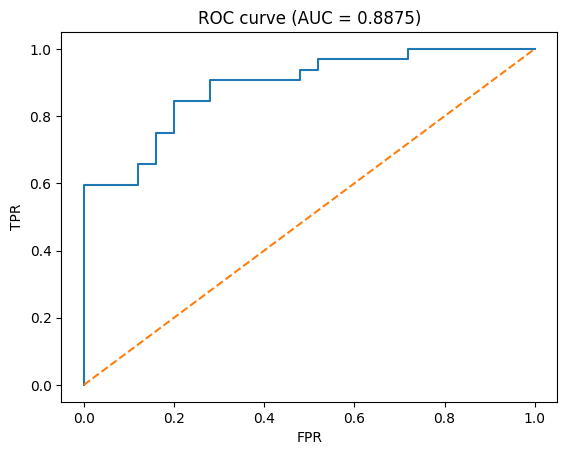

In [20]:
 # -------------------------
# ROC AUC (binary or multiclass handling)
# -------------------------
def compute_roc_auc(y_true, y_prob):
    if num_classes == 2:
        # take prob of positive class (assume class 1 is positive)
        pos_prob = y_prob[:, 1]
        auc = roc_auc_score(y_true, pos_prob)
        fpr, tpr, _ = roc_curve(y_true, pos_prob)
        plt.figure()
        plt.plot(fpr, tpr)
        plt.plot([0,1],[0,1], linestyle='--')
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.title(f"ROC curve (AUC = {auc:.4f})")
        print(f"[INFO] ROC AUC (binary): {auc:.4f} saved to roc_auc.png")
        return auc
    else:
        # multiclass: macro ROC AUC
        try:
            auc = roc_auc_score(y_true, y_prob, multi_class='ovr', average='macro')
            print(f"[INFO] ROC AUC (multiclass, macro): {auc:.4f}")
            return auc
        except Exception as e:
            print("[WARN] ROC AUC could not be computed:", e)
            return None
        
auc = compute_roc_auc(y_true, y_prob)

### Confusion Matrix

[DONE] Training and evaluation complete. Best model saved to: models/pose-recognition-directml.pt


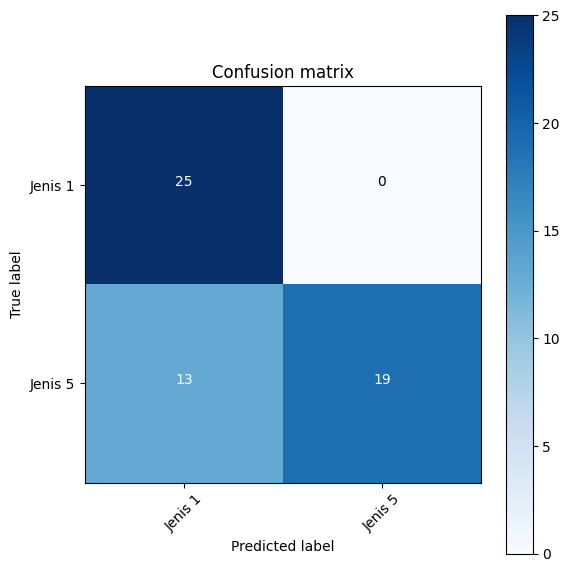

In [21]:
def plot_cm(cm, classes):
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(y_true, y_pred)
plot_cm(cm, class_names)
print("[DONE] Training and evaluation complete. Best model saved to:", MODEL_PATH)

### Classification Report

In [22]:
print("[INFO] Classification report:\n", classification_report(y_true, y_pred, target_names=class_names, digits=4))

[INFO] Classification report:
               precision    recall  f1-score   support

     Jenis 1     0.6579    1.0000    0.7937        25
     Jenis 5     1.0000    0.5938    0.7451        32

    accuracy                         0.7719        57
   macro avg     0.8289    0.7969    0.7694        57
weighted avg     0.8500    0.7719    0.7664        57



## **Convert Model**

In [23]:
import torch
import torch_directml
import torch.nn as nn
import torchvision.models as models

def get_model(num_classes, variant="large"):
    if variant == "large":
        model = models.mobilenet_v3_large(weights="IMAGENET1K_V1")
        in_feats = model.classifier[0].in_features
    else:
        model = models.mobilenet_v3_small(weights="IMAGENET1K_V1")
        in_feats = model.classifier[0].in_features

    model.classifier = nn.Sequential(
        nn.Linear(in_feats, 128),
        nn.Hardswish(),
        nn.Dropout(p=0.3),
        nn.Linear(128, num_classes)
    )
    return model

device = torch.device("cpu")
model = get_model(num_classes=2, variant="large").to(device)

# 🔥 load lama → pakai weights_only=False
checkpoint = torch.load("models/pose-recognition-directml.pt", map_location=device, weights_only=False)

# kalau ternyata checkpoint sudah OrderedDict
if isinstance(checkpoint, dict):
    try:
        model.load_state_dict(checkpoint)
    except RuntimeError:
        # mungkin tersimpan dict dengan key lain, misalnya {"model": state_dict}
        model.load_state_dict(checkpoint["model"])
else:
    # kalau ternyata full nn.Module
    model.load_state_dict(checkpoint.state_dict())

# ✅ simpan ulang jadi state_dict portable
torch.save(model.state_dict(), "models/pose-recognition.pt")
print("[INFO] Konversi selesai → gunakan 'models/pose-recognition.pt'")

[INFO] Konversi selesai → gunakan 'models/pose-recognition.pt'


## **Load Model**

### Using Direct ML

In [24]:
import torch
import torch.nn as nn
import torchvision.models as models

# Sama seperti definisi training
def get_model(num_classes, variant="large"):
    if variant == "large":
        model = models.mobilenet_v3_large(pretrained=True)
        in_feats = model.classifier[0].in_features   # 960
    else:
        model = models.mobilenet_v3_small(pretrained=True)
        in_feats = model.classifier[0].in_features   # 576

    model.classifier = nn.Sequential(
        nn.Linear(in_feats, 128),
        nn.Hardswish(),
        nn.Dropout(p=0.3),
        nn.Linear(128, num_classes)
    )
    return model

# ======================
# Load kembali model
# ======================

import torch_directml
device = torch_directml.device()

num_classes = 2
model = get_model(num_classes=num_classes, variant="large").to(device)

# Load state_dict
model.load_state_dict(torch.load("models/face-expression.pt", map_location=device))

model.eval()
print("[INFO] Model loaded and ready for inference.")

[INFO] Model loaded and ready for inference.


### Using CUDA or CPU

In [25]:
import torch
import torch.nn as nn
import torch_directml
import torchvision.models as models

# Sama seperti definisi training
def get_model(num_classes, variant="large"):
    if variant == "large":
        model = models.mobilenet_v3_large(pretrained=True)
        in_feats = model.classifier[0].in_features   # 960
    else:
        model = models.mobilenet_v3_small(pretrained=True)
        in_feats = model.classifier[0].in_features   # 576

    model.classifier = nn.Sequential(
        nn.Linear(in_feats, 128),
        nn.Hardswish(),
        nn.Dropout(p=0.3),
        nn.Linear(128, num_classes)
    )
    return model

# ======================
# Load kembali model
# ======================

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_classes = 2
model = get_model(num_classes=num_classes, variant="large").to(device)

# Load state_dict
model.load_state_dict(torch.load("models/face-expression.pt", map_location=device))

model.eval()
print("[INFO] Model loaded and ready for inference.")

[INFO] Model loaded and ready for inference.


## **Model Prediction**

[INFO] Model loaded and ready for inference.

=== 3 Sample dari kelas: Tidak Krisis ===
File: 42_00000.jpg | Prediksi: TIDAK KRISIS | Confidence: 0.9206
File: 42_00001.jpg | Prediksi: TIDAK KRISIS | Confidence: 0.9158
File: 42_00002.jpg | Prediksi: TIDAK KRISIS | Confidence: 0.9028


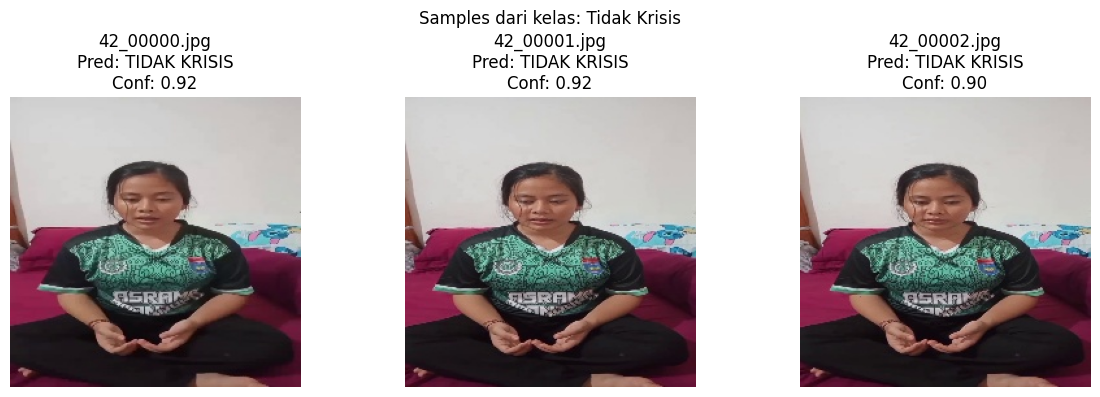


=== 3 Sample dari kelas: Krisis ===
File: 34_00000.jpg | Prediksi: TIDAK KRISIS | Confidence: 0.9672
File: 34_00001.jpg | Prediksi: TIDAK KRISIS | Confidence: 0.9621
File: 34_00002.jpg | Prediksi: TIDAK KRISIS | Confidence: 0.9569


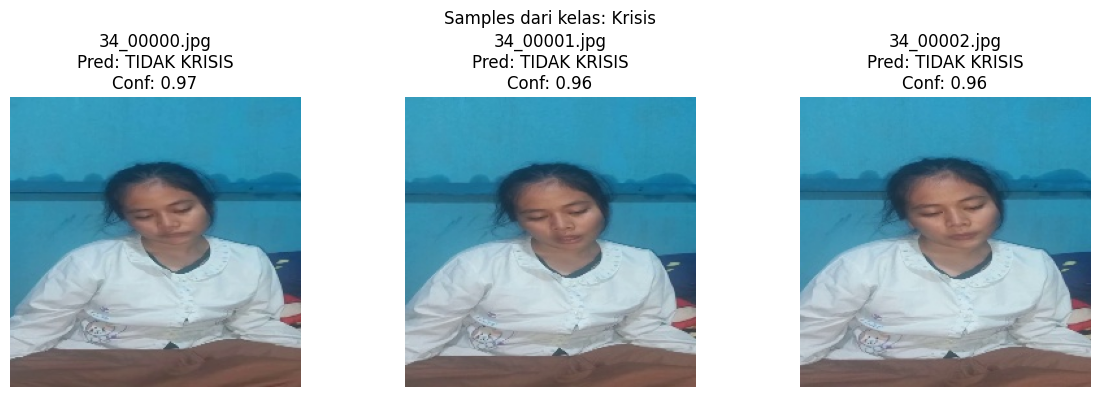

In [26]:
import os
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

import torch_directml
# device = torch_directml.device()
# ======================
# 1. Definisi Model
# ======================
def get_model(num_classes, variant="large"):
    if variant == "large":
        model = models.mobilenet_v3_large(weights="IMAGENET1K_V1")
        in_feats = model.classifier[0].in_features
    else:
        model = models.mobilenet_v3_small(weights="IMAGENET1K_V1")
        in_feats = model.classifier[0].in_features

    model.classifier = nn.Sequential(
        nn.Linear(in_feats, 128),
        nn.Hardswish(),
        nn.Dropout(p=0.3),
        nn.Linear(128, num_classes)
    )
    return model

# ======================
# 2. Load Model
# ======================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = get_model(num_classes=2, variant="large").to(device)

state_dict = torch.load("models/face-expression.pt", map_location=device)
model.load_state_dict(state_dict)
model.eval()
print("[INFO] Model loaded and ready for inference.")

# ======================
# 3. Preprocessing (sesuai training)
# ======================
class To3Channels:
    def __call__(self, x):
        return x.repeat(3, 1, 1) if x.shape[0] == 1 else x

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    To3Channels(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

labels = ["TIDAK KRISIS", "KRISIS"]

def predict_image(model, img_path, device):
    img = Image.open(img_path).convert("RGB")
    img_t = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(img_t)
        probs = torch.softmax(outputs, dim=1)
        pred = torch.argmax(probs, dim=1).item()
        conf = probs[0, pred].item()

    return labels[pred], conf, img

# ======================
# 4. Prediksi & Visualisasi
# ======================
data_dir = "data/2. SKENARIO PSIKOLOGI REMAJA/split/test"
class_dirs = {
    "Tidak Krisis": os.path.join(data_dir, "Jenis 1"),
    "Krisis": os.path.join(data_dir, "Jenis 5")
}

for class_name, folder in class_dirs.items():
    print(f"\n=== 3 Sample dari kelas: {class_name} ===")
    img_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.lower().endswith((".jpg", ".png", ".jpeg"))]
    sample_files = img_files[:3]

    plt.figure(figsize=(12, 4))
    for i, img_path in enumerate(sample_files):
        pred, conf, img = predict_image(model, img_path, device)
        print(f"File: {os.path.basename(img_path)} | Prediksi: {pred} | Confidence: {conf:.4f}")

        plt.subplot(1, 3, i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"{os.path.basename(img_path)}\nPred: {pred}\nConf: {conf:.2f}")

    plt.suptitle(f"Samples dari kelas: {class_name}")
    plt.tight_layout()
    plt.show()

In [27]:
print("[INFO] Training class order:", class_names)


[INFO] Training class order: ['Jenis 1', 'Jenis 5']


In [28]:
imgs, labels_true = next(iter(test_loader))
outputs = model(imgs.to(device))
preds = outputs.argmax(1).cpu().numpy()
print("Preds:", preds[:10])
print("True:", labels_true[:10].numpy())


Preds: [0 0 0 0 0 0 0 0 0 0]
True: [0 0 0 0 0 0 0 0 0 0]
